* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.


In [334]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np


%matplotlib inline

In [335]:
df = pd.read_csv('./fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')
df_origin = pd.read_csv('./fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')

In [336]:
df.head()


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [337]:
df.shape

(1304, 1)

* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [338]:
# Clean data

df_clean = df[
    (df['value'] >= df['value'].quantile(0.025))&
    (df['value'] <= df['value'].quantile(0.975))
]

df_clean.shape

(1238, 1)

In [339]:
# Define the palette as a list to specify exact values


In [340]:
tips = sns.load_dataset("tips")

In [341]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


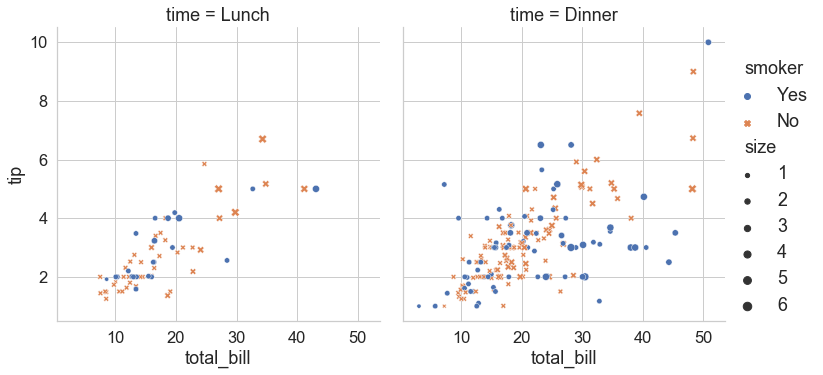

In [342]:
sns.relplot(
    data=tips,
    x="total_bill", # Eje x agrega el label
    y="tip", # Eje y de mi grafica, agrega un label con el nombre de la variable
    col="time", # Divide la grafica en columnas 
    hue="smoker", # Cambia el color de mis puntos
    style="smoker", # Cambia la forma de mis puntos
    size="size", # Cambia el tamano de mis puntos
)

# Todas son variables en mi dataset [total_bill, tip, time, smoker. size]

In [343]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


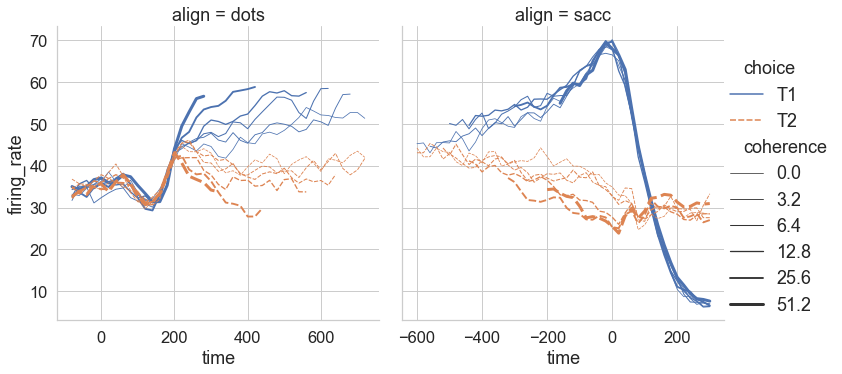

In [344]:

sns.relplot(
    data=dots, 
    kind="line", # Timpo de grafico
    x="time", 
    y="firing_rate", 
    col="align",
    hue="choice", 
    size="coherence", 
    style="choice",
    facet_kws=dict(sharex=False),
)

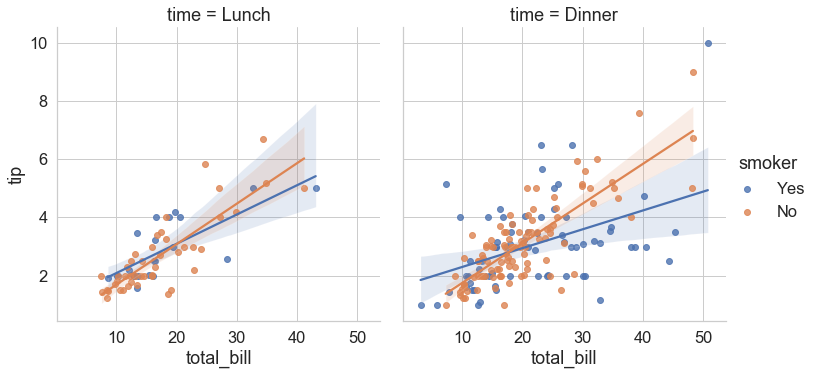

In [345]:
sns.lmplot(
    data=tips, 
    x="total_bill", 
    y="tip", 
    col="time", 
    hue="smoker"
)

In [346]:
df_clean.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


* Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html

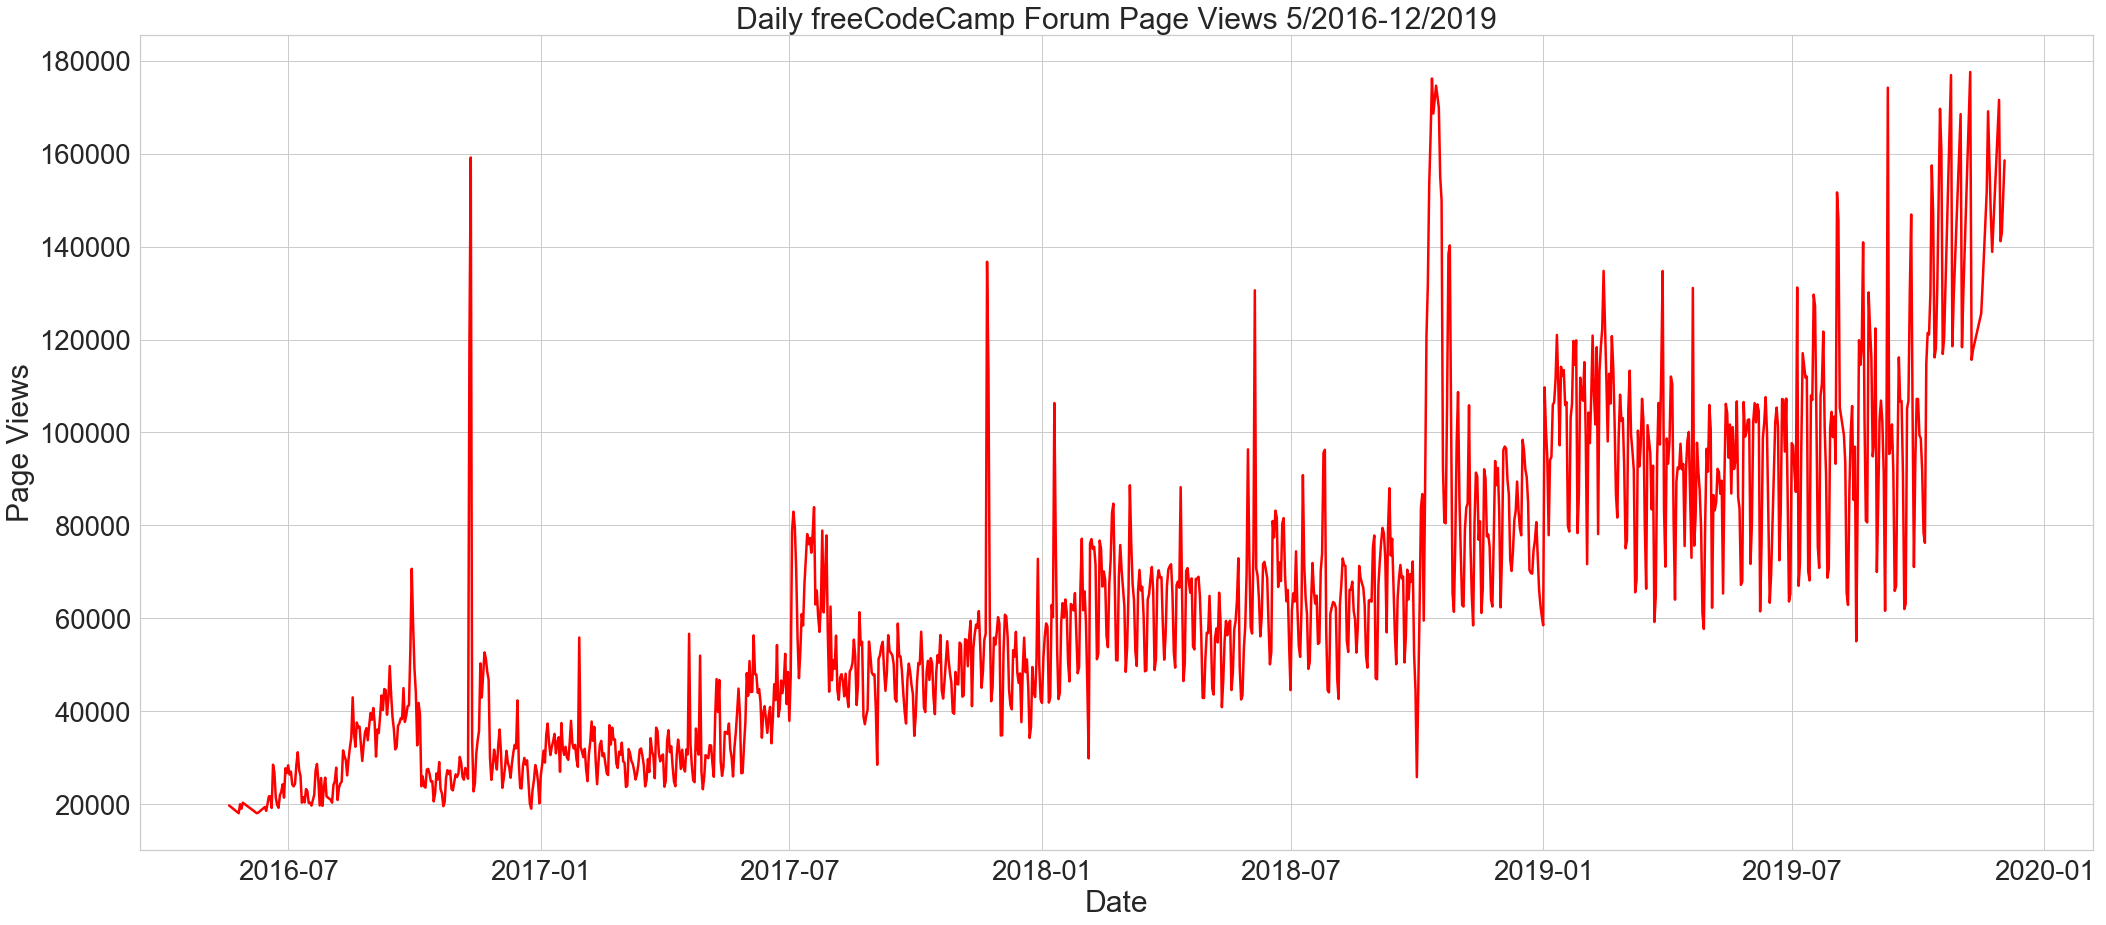

In [526]:
sns.set_theme(style="whitegrid", font_scale=2.50)
fig, ax = plt.subplots(figsize=(35, 15))


ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_ylabel("Page Views")
ax.set_xlabel("Date")


sns.lineplot(
    ax = ax,
    data = df_clean,
    x = 'date',
    y = 'value',
    color='red',
    linewidth=2.5
)

In [412]:
  fig.savefig('lineal_plot.png')

In [349]:
ax.set_ylabel??

Signature: ax.set_ylabel(ylabel, fontdict=None, labelpad=None, **kwargs)
Source:   
    def set_ylabel(self, ylabel, fontdict=None, labelpad=None, **kwargs):
        """
        Set the label for the y-axis.

        Parameters
        ----------
        ylabel : str
            The label text.

        labelpad : scalar, optional, default: None
            Spacing in points between the label and the y-axis.

        Other Parameters
        ----------------
        **kwargs : `.Text` properties
            `.Text` properties control the appearance of the label.

        See also
        --------
        text : for information on how override and the optional args work

        """
        if labelpad is not None:
            self.yaxis.labelpad = labelpad
        return self.yaxis.set_label_text(ylabel, fontdict, **kwargs)
File:      ~/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py
Type:      method


* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [350]:
df_clean = df_clean.reset_index()
df_clean

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325
5,2016-06-07,18335
6,2016-06-08,18072
7,2016-06-09,18139
8,2016-06-14,19395
9,2016-06-15,18584


In [369]:
df_clean['month'] = df_clean["date"].apply(lambda x: x.month_name())
df_clean['month_num'] = df_clean["date"].apply(lambda x: x.month)
df_clean['year'] = df_clean["date"].apply(lambda x: x.year)

In [404]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_clean = df_clean.sort_values(by = ["year","month_num"])

df_clean

,date,value,month,year,month_num
2,2016-05-27,19997,May,2016,5
0,2016-05-19,19736,May,2016,5
3,2016-05-28,19044,May,2016,5
4,2016-05-29,20325,May,2016,5
1,2016-05-26,18060,May,2016,5
10,2016-06-17,21691,June,2016,6
15,2016-06-22,21424,June,2016,6
7,2016-06-09,18139,June,2016,6
5,2016-06-07,18335,June,2016,6
23,2016-06-30,26696,June,2016,6


In [463]:
df_group = df_clean.groupby(['month','month_num','year', ]).value.agg(['mean'])
data = df_group.reset_index().sort_values(by='month_num')

data

,month,month_num,year,mean
16,January,1,2019,102056.516129
15,January,1,2018,58580.096774
14,January,1,2017,32785.161290
13,February,2,2019,105968.357143
12,February,2,2018,65679.000000
11,February,2,2017,31113.071429
25,March,3,2017,29369.096774
27,March,3,2019,91214.483871
26,March,3,2018,62693.774194
0,April,4,2017,30878.733333


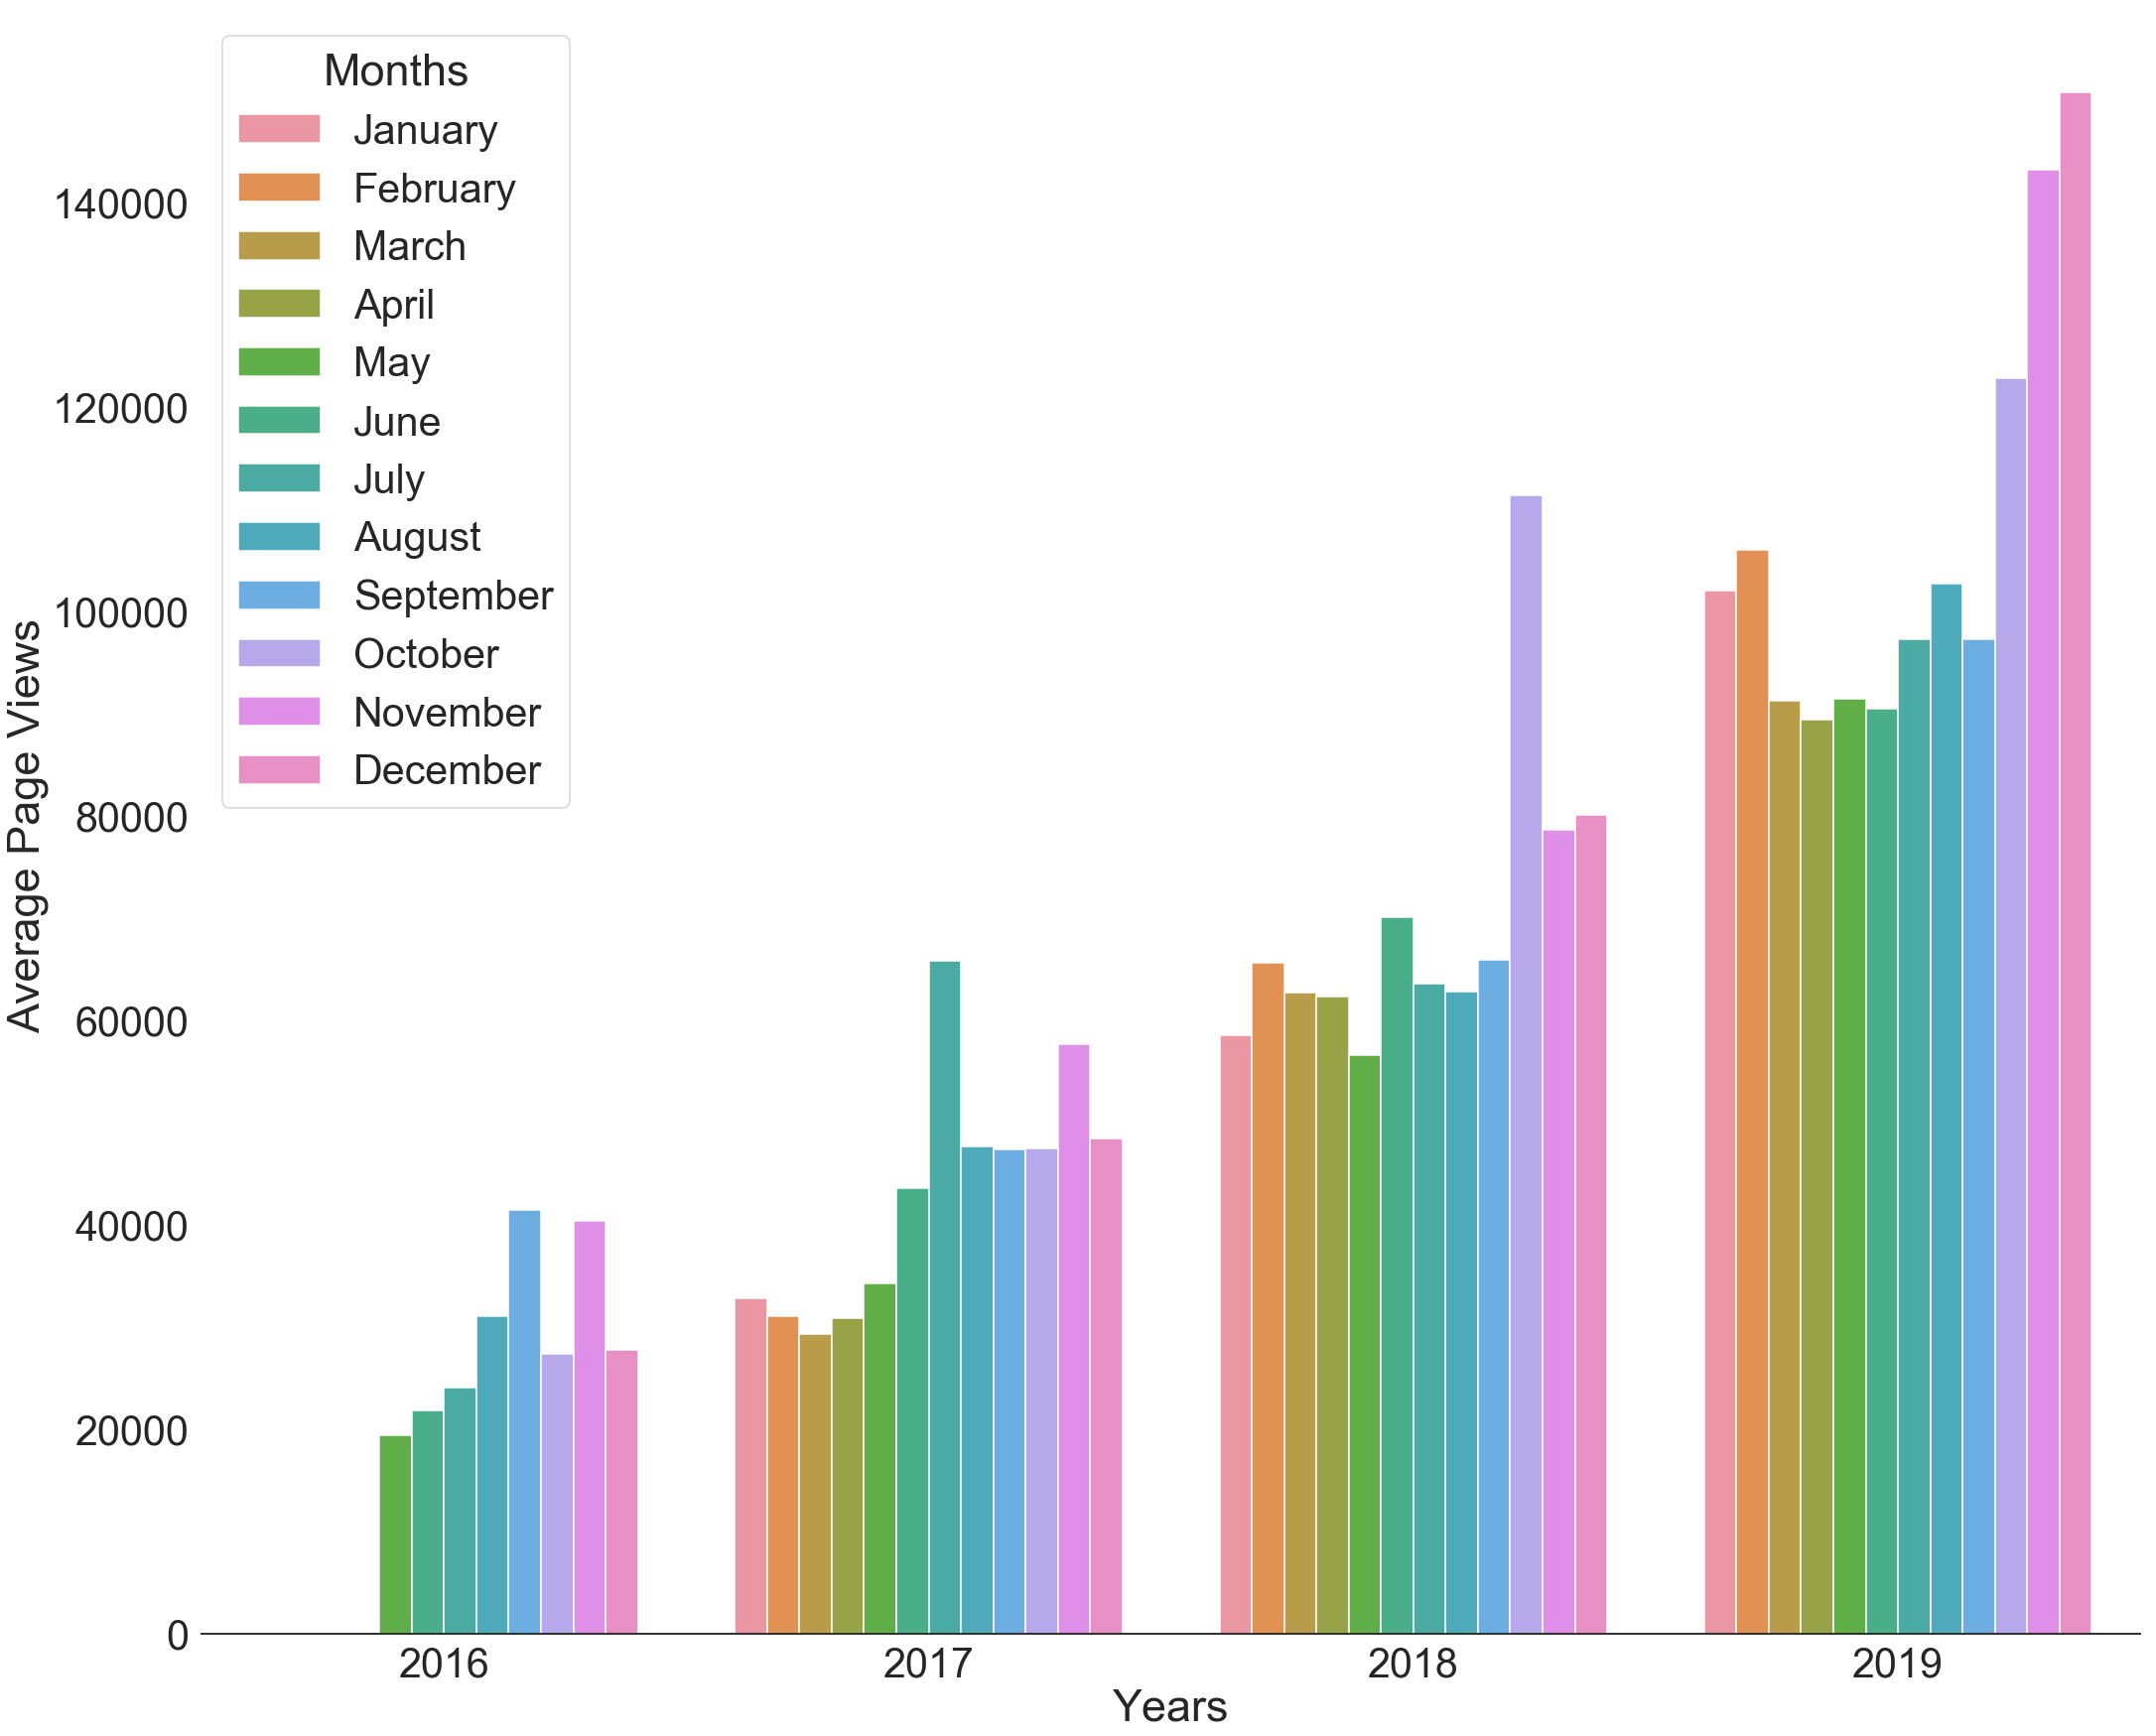

In [529]:
sns.set_theme(style="white", context="talk", font_scale=2.50)

fig, ax = plt.subplots(figsize=(35, 30))


sns.barplot(
    x='year', 
    y='mean',
    hue = 'month',
    data=data,
    ax = ax,
)


sns.despine(ax=ax, left=True)
ax.set_ylabel("Average Page Views")
ax.set_xlabel("Years")
l = ax.legend(loc='upper left')
l.set_title('Months')


In [465]:
  fig.savefig('bar_plot.png')

* Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [474]:
df_clean

,date,value,month,year,month_num
2,2016-05-27,19997,May,2016,5
0,2016-05-19,19736,May,2016,5
3,2016-05-28,19044,May,2016,5
4,2016-05-29,20325,May,2016,5
1,2016-05-26,18060,May,2016,5
10,2016-06-17,21691,June,2016,6
15,2016-06-22,21424,June,2016,6
7,2016-06-09,18139,June,2016,6
5,2016-06-07,18335,June,2016,6
23,2016-06-30,26696,June,2016,6


In [540]:

df_group = df_clean.groupby(['year']).apply(lambda x: x)
bx1 = df_group


df_group = df_clean.groupby(['month']).apply(lambda x: x)
bx2 = df_group.sort_values(by='month_num')



In [541]:
bx1.head()

,date,value,month,year,month_num
2,2016-05-27,19997,May,2016,5
0,2016-05-19,19736,May,2016,5
3,2016-05-28,19044,May,2016,5
4,2016-05-29,20325,May,2016,5
1,2016-05-26,18060,May,2016,5


In [542]:
bx2.head()

,date,value,month,year,month_num
221,2017-01-17,32119,January,2017,1
954,2019-01-23,119710,January,2019,1
956,2019-01-25,119836,January,2019,1
957,2019-01-26,78342,January,2019,1
959,2019-01-28,111784,January,2019,1


In [543]:
bx2['month'] = bx2['month'].apply(lambda x: x[0:3])
bx2

,date,value,month,year,month_num
221,2017-01-17,32119,Jan,2017,1
954,2019-01-23,119710,Jan,2019,1
956,2019-01-25,119836,Jan,2019,1
957,2019-01-26,78342,Jan,2019,1
959,2019-01-28,111784,Jan,2019,1
955,2019-01-24,114541,Jan,2019,1
958,2019-01-27,86596,Jan,2019,1
235,2017-01-31,31334,Jan,2017,1
234,2017-01-30,32284,Jan,2017,1
233,2017-01-29,55875,Jan,2017,1


Text(0.5, 0, 'Months')

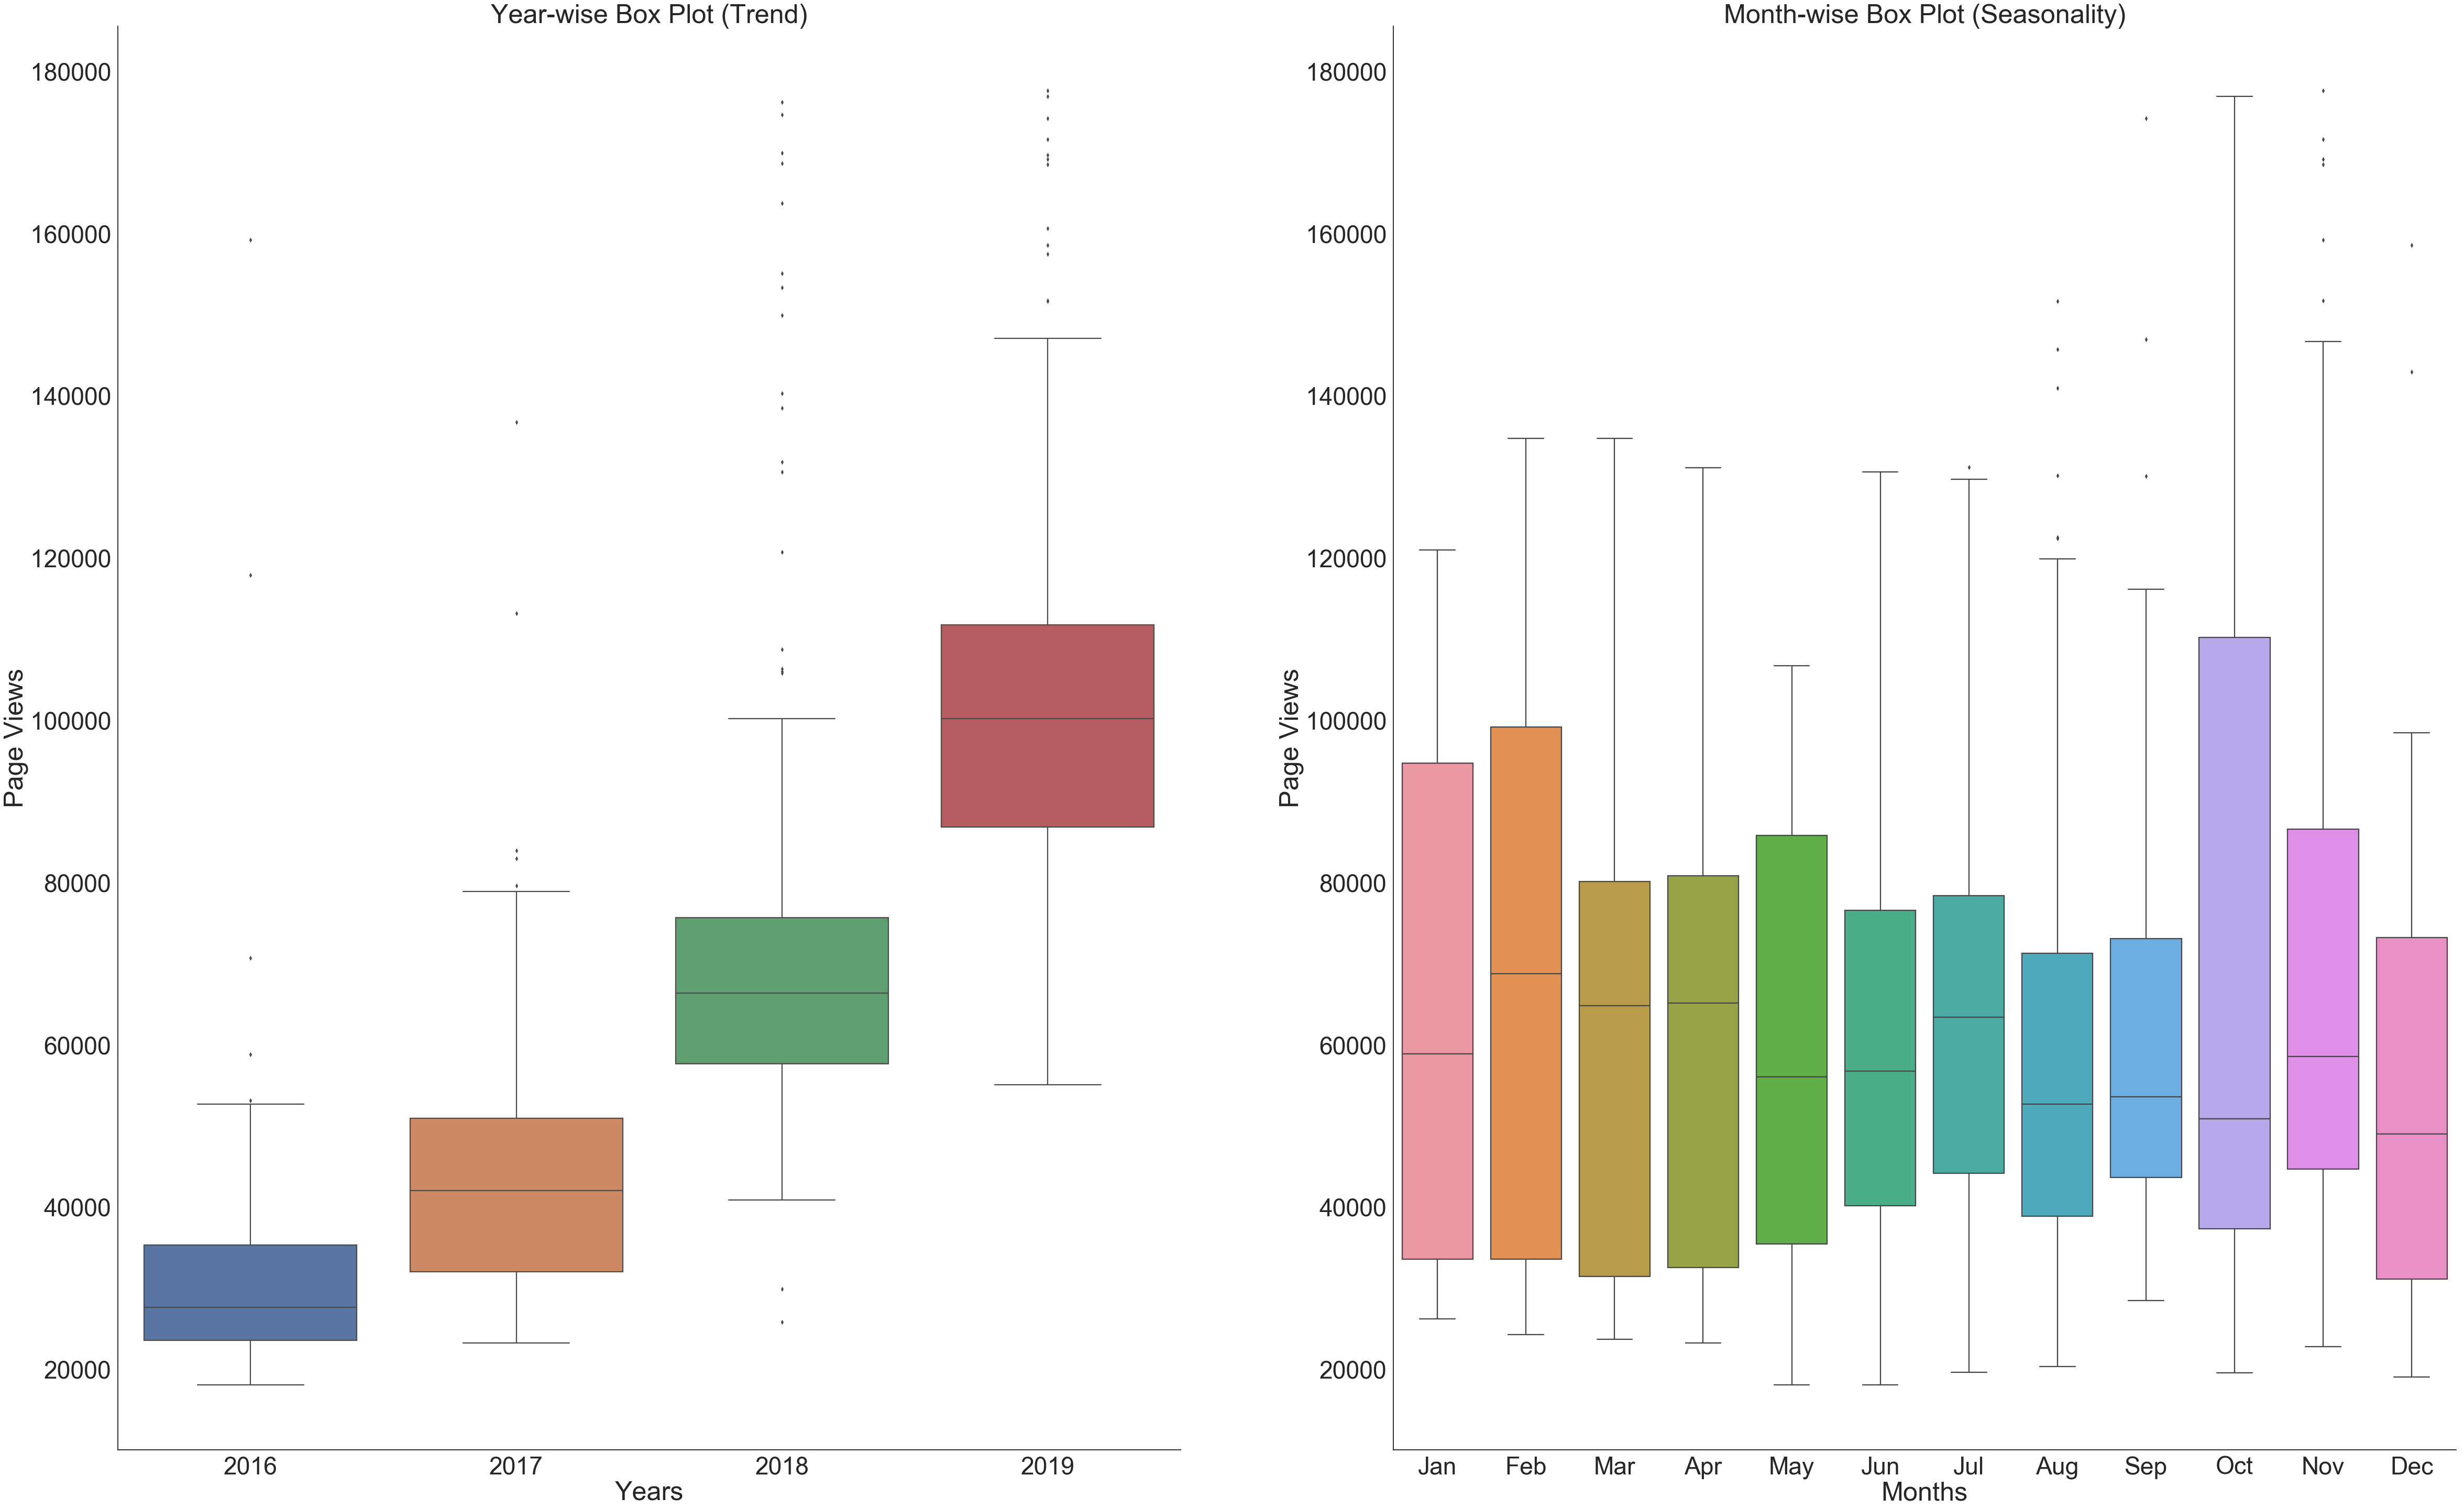

In [547]:
sns.set_theme(style="white", context="talk", font_scale=2.80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(80, 50))


sns.boxplot(
    x='year', 
    y='value',
    data=bx1,
    ax = ax1,
   
)



sns.boxplot(
    x='month', 
    y='value',
    data=bx2,
    ax = ax2,
   
)


sns.despine(ax=ax1)
ax1.set_title("Year-wise Box Plot (Trend)")
ax1.set_ylabel("Page Views")
ax1.set_xlabel("Years")



sns.despine(ax=ax2)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_ylabel("Page Views")
ax2.set_xlabel("Months")



